In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import random
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.path import Path

In [11]:
def triangular_grid2d(l, h, r):
    d = r*np.sqrt(3)
    N_l = np.ceil((((l-d)/d) + 1))
    N_h = np.ceil(((2*np.sqrt(3)*h-6*d+4*np.sqrt(3)*r)/(3*d)) + 1)
    print(N_h)
    N_total = N_h * N_l
    dy = np.power(d, 2) - np.power(d/2, 2)
    dy = np.sqrt(dy)
    dh = ((np.sqrt(3)/2) * d) - r
    dl = d/2

    sensor_pos = {'x' : [], 'y':[]}
    sensor_coverage = []

    count = 0
    for x in range(0, int(N_l)):
        for y in range(0, int(N_h)):
            if y % 2 != 0:
                # Odd
                x_p = (d * x) 
                y_p = dy * y
                sensor_pos['x'].append(x_p)
                sensor_pos['y'].append(y_p)
                sensor_coverage.append((x_p, y_p))
            else:
                x_p = (d * x) + (d/2)
                y_p = dy * y
                sensor_pos['x'].append(x_p)
                sensor_pos['y'].append(y_p)
                sensor_coverage.append((x_p, y_p))

            count += 1
            
    print(f"N_i : {N_l} | N_h : {N_h} | N_total : {N_total} | d/r : {d/r} | count : {count} | d : {d} | dy : {dy} | dl : {dl} | dh : {dh}")
    return sensor_pos, sensor_coverage

def triangular_grid2d_inverse(l, h, r):
    d = r*np.sqrt(3)
    N_l = np.ceil((((l-d)/d) + 1))
    N_h = np.ceil(((2*np.sqrt(3)*h-6*d+4*np.sqrt(3)*r)/(3*d)) + 1)
    print(N_h)
    N_total = N_h * N_l
    dy = np.power(d, 2) - np.power(d/2, 2)
    dy = np.sqrt(dy)
    dh = ((np.sqrt(3)/2) * d) - r
    dl = d/2

    sensor_pos = {'x' : [], 'y':[]}
    sensor_coverage = []

    count = 0
    for x in range(0, int(N_h)):
        for y in range(0, int(N_l)):
            if y % 2 != 0:
                # Odd
                x_p = (d * x) 
                y_p = dy * y
                sensor_pos['x'].append(x_p)
                sensor_pos['y'].append(y_p)
                sensor_coverage.append((x_p, y_p))
            else:
                x_p = (d * x) + (d/2)
                y_p = dy * y
                sensor_pos['x'].append(x_p)
                sensor_pos['y'].append(y_p)
                sensor_coverage.append((x_p, y_p))

            count += 1
            
    print(f"N_i : {N_l} | N_h : {N_h} | N_total : {N_total} | d/r : {d/r} | count : {count} | d : {d} | dy : {dy} | dl : {dl} | dh : {dh}")
    return sensor_pos, sensor_coverage

def triangular_grid3d(l, h, depth, r):
    d = r*np.sqrt(3)
    N_l = np.ceil((((l-d)/d) + 1))
    N_h = np.ceil(((2*np.sqrt(3)*h-6*d+4*np.sqrt(3)*r)/(3*d)) + 1)
    N_d = np.ceil(((2*np.sqrt(3)*depth-6*d+4*np.sqrt(3)*r)/(3*d)) + 1)

    N_total = N_h * N_l
    dy = np.power(d, 2) - np.power(d/2, 2)
    dy = np.sqrt(dy)
    dh = ((np.sqrt(3)/2) * d) - r
    dl = d/2

    sensor_pos = {'x' : [], 'y':[], 'z':[]}
    sensor_coverage = []

    count = 0
    for z in range(0, int(N_d)):
        for x in range(0, int(N_h)):
            for y in range(0, int(N_l)):
                if z % 2 == 0:
                    if y % 2 != 0:
                        # Odd
                        x_p = (d * x) 
                        y_p = dy * y
                        z_p = dy * z
                        sensor_pos['x'].append(x_p)
                        sensor_pos['y'].append(y_p)
                        sensor_pos['z'].append(z_p)
                        sensor_coverage.append((x_p, y_p, z_p))
                    else:
                        x_p = (d * x) + (d/2)
                        y_p = dy * y
                        z_p = dy * z
                        sensor_pos['x'].append(x_p)
                        sensor_pos['y'].append(y_p)
                        sensor_pos['z'].append(z_p)
                        sensor_coverage.append((x_p, y_p, z_p))
                else:
                    if y % 2 != 0:
                        # Odd
                        x_p = (d * x) + (d/2)
                        y_p = dy *  + (d/2)
                        z_p = dy * z
                        sensor_pos['x'].append(x_p)
                        sensor_pos['y'].append(y_p)
                        sensor_pos['z'].append(z_p)
                        sensor_coverage.append((x_p, y_p, z_p))
                    else:
                        x_p = (d * x) + (d/2) + (d/2)
                        y_p = dy * y + (d/2)
                        z_p = dy * z
                        sensor_pos['x'].append(x_p)
                        sensor_pos['y'].append(y_p)
                        sensor_pos['z'].append(z_p)
                        sensor_coverage.append((x_p, y_p, z_p))
  
            
    print(f"N_i : {N_l} | N_h : {N_h} | N_total : {N_total} | d/r : {d/r} | count : {count} | d : {d} | dy : {dy} | dl : {dl} | dh : {dh}")
    return sensor_pos, sensor_coverage

4.0
N_i : 3.0 | N_h : 4.0 | N_total : 12.0 | d/r : 1.7320508075688772 | count : 12 | d : 433.0127018922193 | dy : 374.99999999999994 | dl : 216.50635094610965 | dh : 124.99999999999994
4.0
N_i : 3.0 | N_h : 4.0 | N_total : 12.0 | d/r : 1.7320508075688772 | count : 12 | d : 433.0127018922193 | dy : 374.99999999999994 | dl : 216.50635094610965 | dh : 124.99999999999994


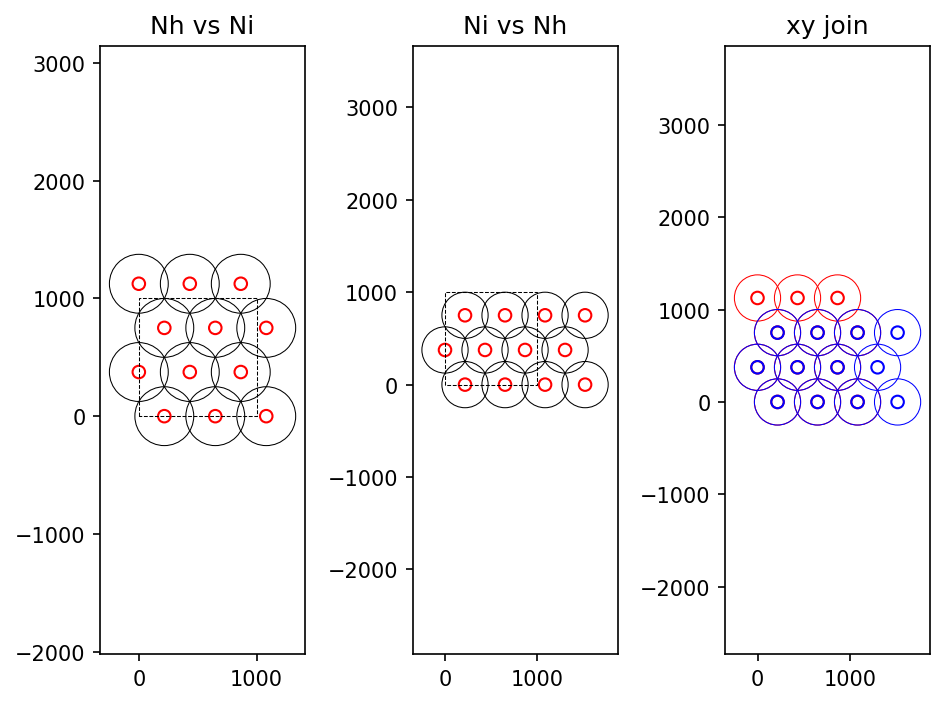

In [12]:
h = 1e3
l = 1e3
depth = 3e3
r = 250

fig, ax = plt.subplots(1,3 , dpi=150)

sensor_pos1, sensors_coverage1 = triangular_grid2d(l, h, r)
sensor_pos2, sensors_coverage2 = triangular_grid2d_inverse(l, h, r)
ax[0].scatter(sensor_pos1['x'], sensor_pos1['y'], color='r', edgecolors=None, facecolors='None')
ax[1].scatter(sensor_pos2['x'], sensor_pos2['y'], color='r', edgecolors=None, facecolors='None')

ax[2].scatter(sensor_pos1['x'], sensor_pos1['y'], color='r', edgecolors=None, facecolors='None')
ax[2].scatter(sensor_pos2['x'], sensor_pos2['y'], color='b', edgecolors=None, facecolors='None')

for sensor_coverage in sensors_coverage1:
    circle = plt.Circle(sensor_coverage, r, color='k', fill=False, linewidth=0.5)
    ax[0].add_patch(circle)
    circle = plt.Circle(sensor_coverage, r, color='r', fill=False, linewidth=0.5)
    ax[2].add_patch(circle)


for sensor_coverage in sensors_coverage2:
    circle = plt.Circle(sensor_coverage, r, color='k', fill=False, linewidth=0.5)
    ax[1].add_patch(circle)
    circle = plt.Circle(sensor_coverage, r, color='b', fill=False, linewidth=0.5)
    ax[2].add_patch(circle)

    

verts = [
   (0., 0.),  # left, bottom
   (0., h),  # left, top
   (l, h),  # right, top
   (l, 0.),  # right, bottom
   (0., 0.),  # ignored
]

codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]

path = Path(verts, codes)

rect = patches.PathPatch(path, facecolor='none', lw=0.5, linestyle='--')
ax[0].add_patch(rect)
rect = patches.PathPatch(path, facecolor='none', lw=0.5, linestyle='--')
ax[1].add_patch(rect)

ax[0].axis('equal')
ax[1].axis('equal')
ax[2].axis('equal')

ax[0].set_title('Nh vs Ni')
ax[1].set_title('Ni vs Nh')
ax[2].set_title('xy join')
plt.tight_layout()

4.0
N_i : 3.0 | N_h : 4.0 | N_total : 12.0 | d/r : 1.7320508075688772 | count : 12 | d : 433.0127018922193 | dy : 374.99999999999994 | dl : 216.50635094610965 | dh : 124.99999999999994


(-329.1265877365274, 1411.6583424670757, -331.25, 1456.2499999999998)

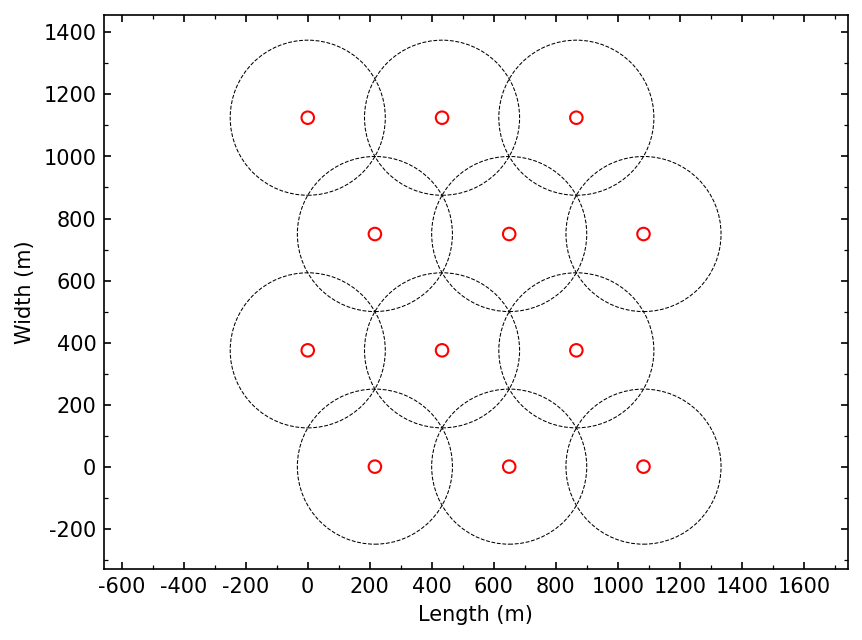

In [13]:
fig, ax = plt.subplots(dpi=150)
ax.yaxis.set_major_locator(MultipleLocator(int(l//5)))
ax.yaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_minor_locator(MultipleLocator(int(l//10)))
ax.xaxis.set_major_locator(MultipleLocator(int(h//5)))
ax.xaxis.set_major_formatter('{x:.0f}')
ax.xaxis.set_minor_locator(MultipleLocator(int(h//10)))
ax.tick_params(top=True, right=True, which='both', direction='in')

sensor_pos1, sensors_coverage1 = triangular_grid2d(l, h, r)
ax.scatter(sensor_pos1['x'], sensor_pos1['y'], color='r', edgecolors=None, facecolors='None')

for sensor_coverage in sensors_coverage1:
    circle = plt.Circle(sensor_coverage, r, color='k', fill=False, linewidth=0.5, linestyle='--')
    ax.add_patch(circle)


ax.set_xlabel('Length (m)')
ax.set_ylabel('Width (m)')
plt.axis('equal')

4.0
N_i : 3.0 | N_h : 4.0 | N_total : 12.0 | d/r : 1.7320508075688772 | count : 12 | d : 433.0127018922193 | dy : 374.99999999999994 | dl : 216.50635094610965 | dh : 124.99999999999994


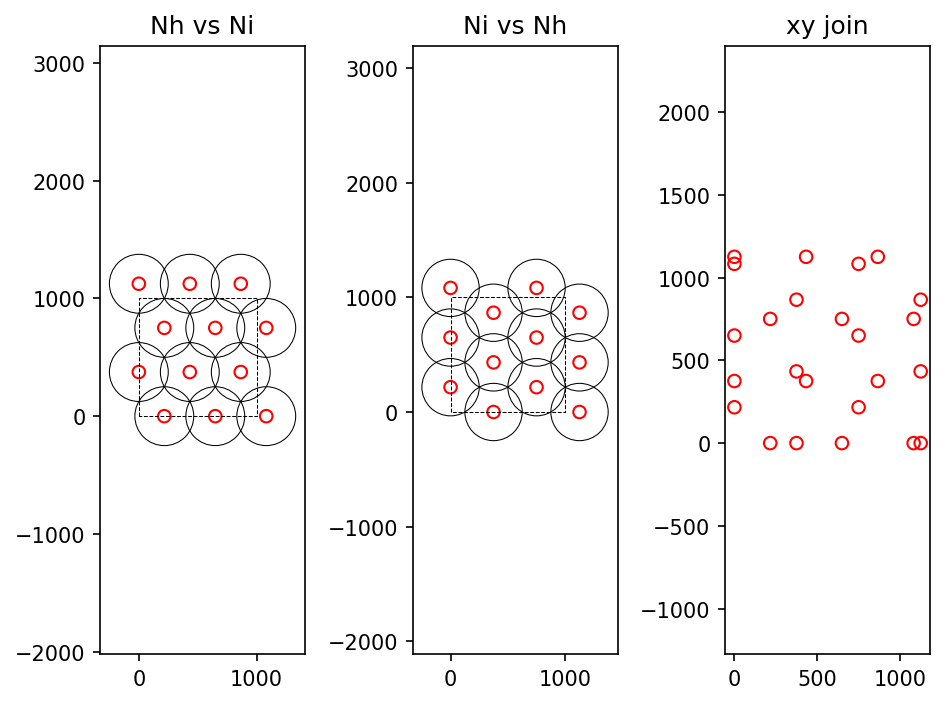

In [14]:
fig, ax = plt.subplots(1,3 , dpi=150)

sensor_pos1, sensors_coverage1 = triangular_grid2d(l, h, r)

ax[0].scatter(sensor_pos1['x'], sensor_pos1['y'], color='r', edgecolors=None, facecolors='None')
ax[1].scatter(sensor_pos1['y'], sensor_pos1['x'], color='r', edgecolors=None, facecolors='None')

ax[2].scatter(sensor_pos1['x'], sensor_pos1['y'], color='r', edgecolors=None, facecolors='None')
ax[2].scatter(sensor_pos1['y'], sensor_pos1['x'], color='r', edgecolors=None, facecolors='None')

for sensor_coverage in sensors_coverage1:
    circle = plt.Circle(sensor_coverage, r, color='k', fill=False, linewidth=0.5)
    ax[0].add_patch(circle)
    circle = plt.Circle(sensor_coverage, r, color='k', fill=False, linewidth=0.5)
    #ax[2].add_patch(circle)


for sensor_coverage in sensors_coverage1:
    x, y = sensor_coverage
    sensor_coverage = (y, x)
    circle = plt.Circle(sensor_coverage, r, color='k', fill=False, linewidth=0.5)
    ax[1].add_patch(circle)
    circle = plt.Circle(sensor_coverage, r, color='k', fill=False, linewidth=0.5)
    #ax[2].add_patch(circle)

    

verts = [
   (0., 0.),  # left, bottom
   (0., h),  # left, top
   (l, h),  # right, top
   (l, 0.),  # right, bottom
   (0., 0.),  # ignored
]

codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]

path = Path(verts, codes)

rect = patches.PathPatch(path, facecolor='none', lw=0.5, linestyle='--')
ax[0].add_patch(rect)
rect = patches.PathPatch(path, facecolor='none', lw=0.5, linestyle='--')
ax[1].add_patch(rect)

ax[0].axis('equal')
ax[1].axis('equal')
ax[2].axis('equal')

ax[0].set_title('Nh vs Ni')
ax[1].set_title('Ni vs Nh')
ax[2].set_title('xy join')
plt.tight_layout()

N_i : 3.0 | N_h : 4.0 | N_total : 12.0 | d/r : 1.7320508075688772 | count : 0 | d : 433.0127018922193 | dy : 374.99999999999994 | dl : 216.50635094610965 | dh : 124.99999999999994


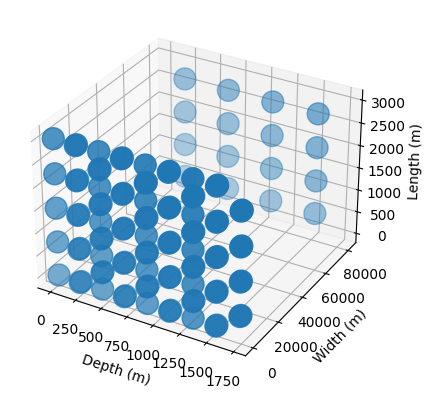

In [15]:
sensor_pos, sensors_coverage = triangular_grid3d(l, h, depth, r)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with specified radii
ax.scatter(sensor_pos['x'], sensor_pos['y'], sensor_pos['z'], s=r)

ax.set_xlabel('Depth (m)')
ax.set_ylabel('Width (m)')
ax.set_zlabel('Length (m)')

plt.show()


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def get_cube():   
    phi = np.arange(1,10,2)*np.pi/4
    Phi, Theta = np.meshgrid(phi, phi)

    x = np.cos(Phi)*np.sin(Theta)
    y = np.sin(Phi)*np.sin(Theta)
    z = np.cos(Theta)/np.sqrt(2)
    return x,y,z

a = 100
b = 100
c = -10
x,y,z = get_cube()


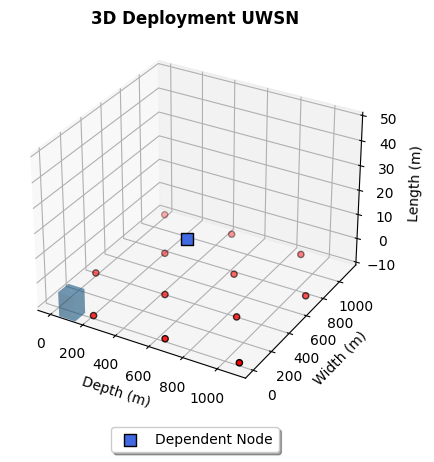

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')



# Scatter plot with specified radii
ax.scatter(h/2, l/2, 10, label='Dependent Node', s=65, marker="s",color='royalblue', edgecolors='k')
ax.plot_surface((x*a) + 50, (y*b) + 50, (z*c) + -10, alpha=0.2)
ax.scatter(sensor_pos1['x'], sensor_pos1['y'], -10, label='', marker="o",color='r', edgecolors='k')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_zlim([-10, 50])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=5, markerscale=1, fontsize=10)

font = {
        'color':  'black',
        'weight': 'bold'
        }

ax.set_title('3D Deployment UWSN', fontdict=font)
ax.set_xlabel('Depth (m)')
ax.set_ylabel('Width (m)')
ax.set_zlabel('Length (m)')

plt.show()
